![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [78]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!
netflix_data = pd.read_csv('netflix_data.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [79]:
netflix_subset = netflix_data[netflix_data['type'] == 'Movie']
netflix_subset.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [80]:
netflix_movies = netflix_subset[['title', 'country', 'genre', 'release_year','duration']]
print(netflix_movies.head())

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


In [81]:
short_movies = netflix_movies[netflix_movies['duration'] < 60]
print(short_movies.head(20))

                                                 title  ... duration
35                                           #Rucker50  ...       56
55                 100 Things to do Before High School  ...       44
67   13TH: A Conversation with Oprah Winfrey & Ava ...  ...       37
101                                  3 Seconds Divorce  ...       53
146                                     A 3 Minute Hug  ...       28
162  A Christmas Special: Miraculous: Tales of Lady...  ...       22
171                         A Family Reunion Christmas  ...       29
177                    A Go! Go! Cory Carson Christmas  ...       22
178                    A Go! Go! Cory Carson Halloween  ...       22
179                  A Go! Go! Cory Carson Summer Camp  ...       21
181             A Grand Night In: The Story of Aardman  ...       59
200                            A Love Song for Latasha  ...       20
220                         A Russell Peters Christmas  ...       44
233                              A

In [82]:
netflix_movies['genre'].unique()

array(['Dramas', 'Horror Movies', 'Action', 'Documentaries',
       'Independent Movies', 'Comedies', 'Sports Movies', 'Uncategorized',
       'International Movies', 'Sci-Fi', 'Children', 'Classic Movies',
       'Thrillers', 'Stand-Up', 'Anime Features', 'Music', 'Cult Movies',
       'Romantic Movies', 'LGBTQ Movies'], dtype=object)

In [83]:
colors = []

for lab, row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        colors.append('Children')
    elif row['genre'] == 'Documentaries':
        colors.append('Documentaries')
    elif row['genre'] == 'Stand-Up':
        colors.append('Stand-Up')
    else:
        colors.append('Other')

In [84]:
# Define a color mapping dictionary
color_mapping = {
    'Other': 0,
    'Documentaries': 1,
    'Children': 2,
    'Stand-Up': 3
}

In [85]:
# Convert the colors list to numeric values using the color mapping
numeric_colors = [color_mapping[color] for color in colors]

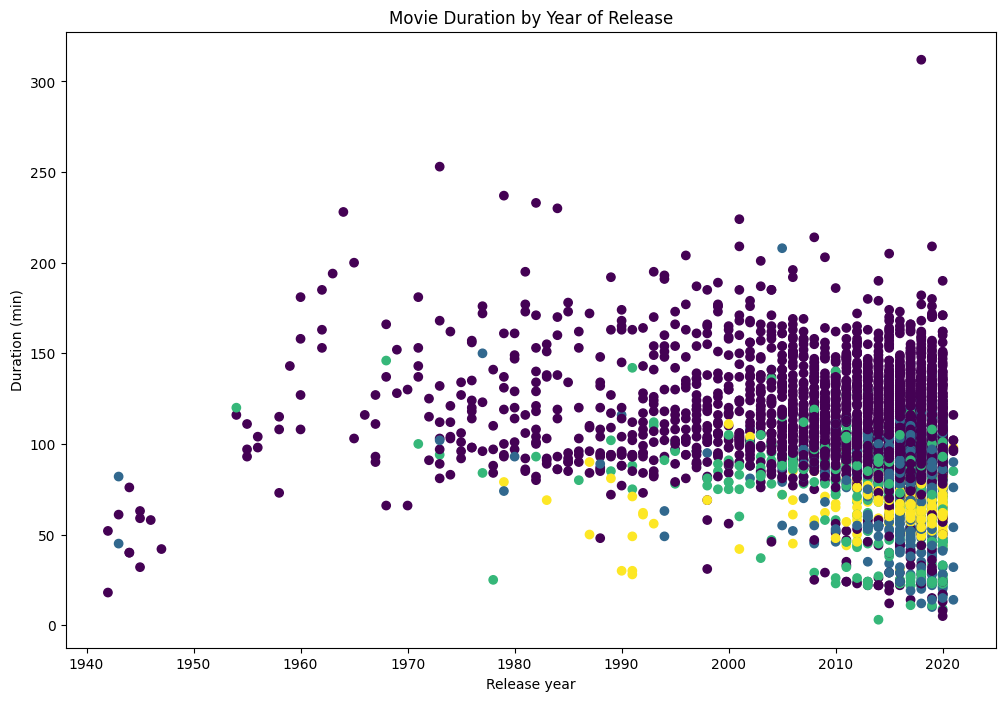

In [86]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=numeric_colors)
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.show()

In [87]:
# Are we certain that movies are getting shorter?
answer = 'maybe'
print(answer)

maybe
